In [64]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed


In [65]:
data['MA50'] = data['Close'].rolling(window=50).mean()


In [66]:
def compute_rsi(data, window):
  diff = data.diff(1).dropna()       #get thhe difference in price from the previous day
  gain = (diff.where(diff > 0, 0)).rolling(window=window).mean()
  loss = (diff.where(diff < 0, 0)).rolling(window=window).mean()
  rs   = gain/loss   #relative strenth
  rsi  = 100 - (100/(1+rs))        # relative strength index
  #Calculate the 14 day RSI
  return rsi
  data['RSI'] = compute_rsi(data['close'],14)
  return data
  print(data.head())


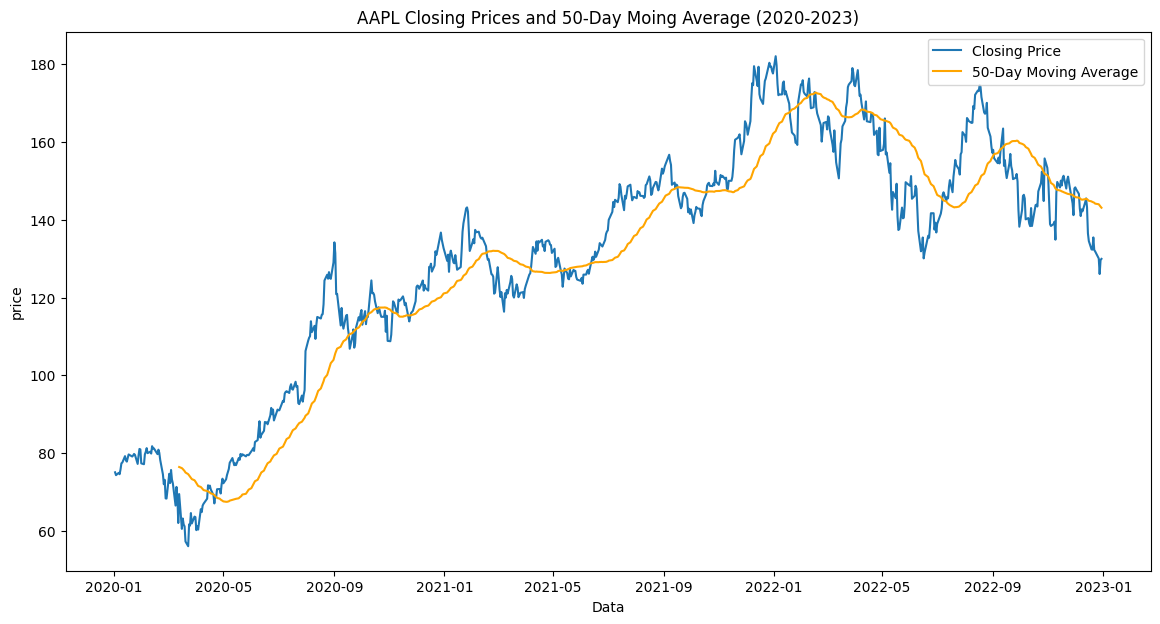

In [67]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label="50-Day Moving Average", color='orange')
plt.title('AAPL Closing Prices and 50-Day Moing Average (2020-2023)')
plt.xlabel('Data')
plt.ylabel('price')
plt.legend()
plt.show()


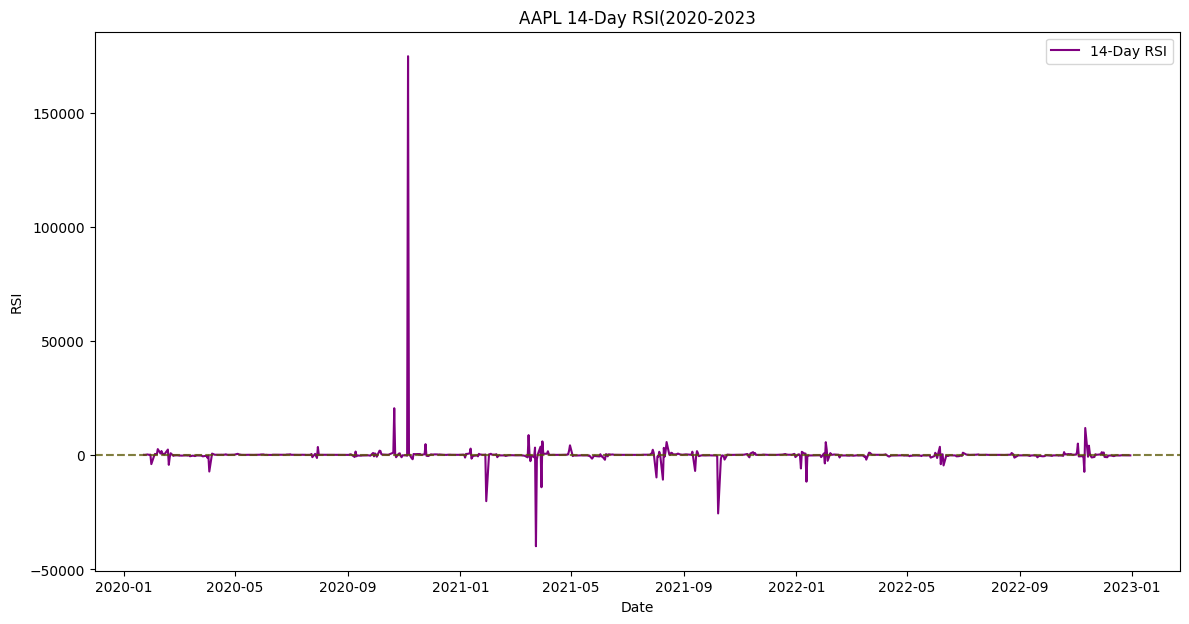

In [68]:
# plot for RSI
plt.figure(figsize=(14, 7))
data['MA50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = compute_rsi(data['Close'],14)
plt.plot(data['RSI'],label= '14-Day RSI', color='purple')
plt.axhline(30, linestyle="--", alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='green')
plt.title('AAPL 14-Day RSI(2020-2023')
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

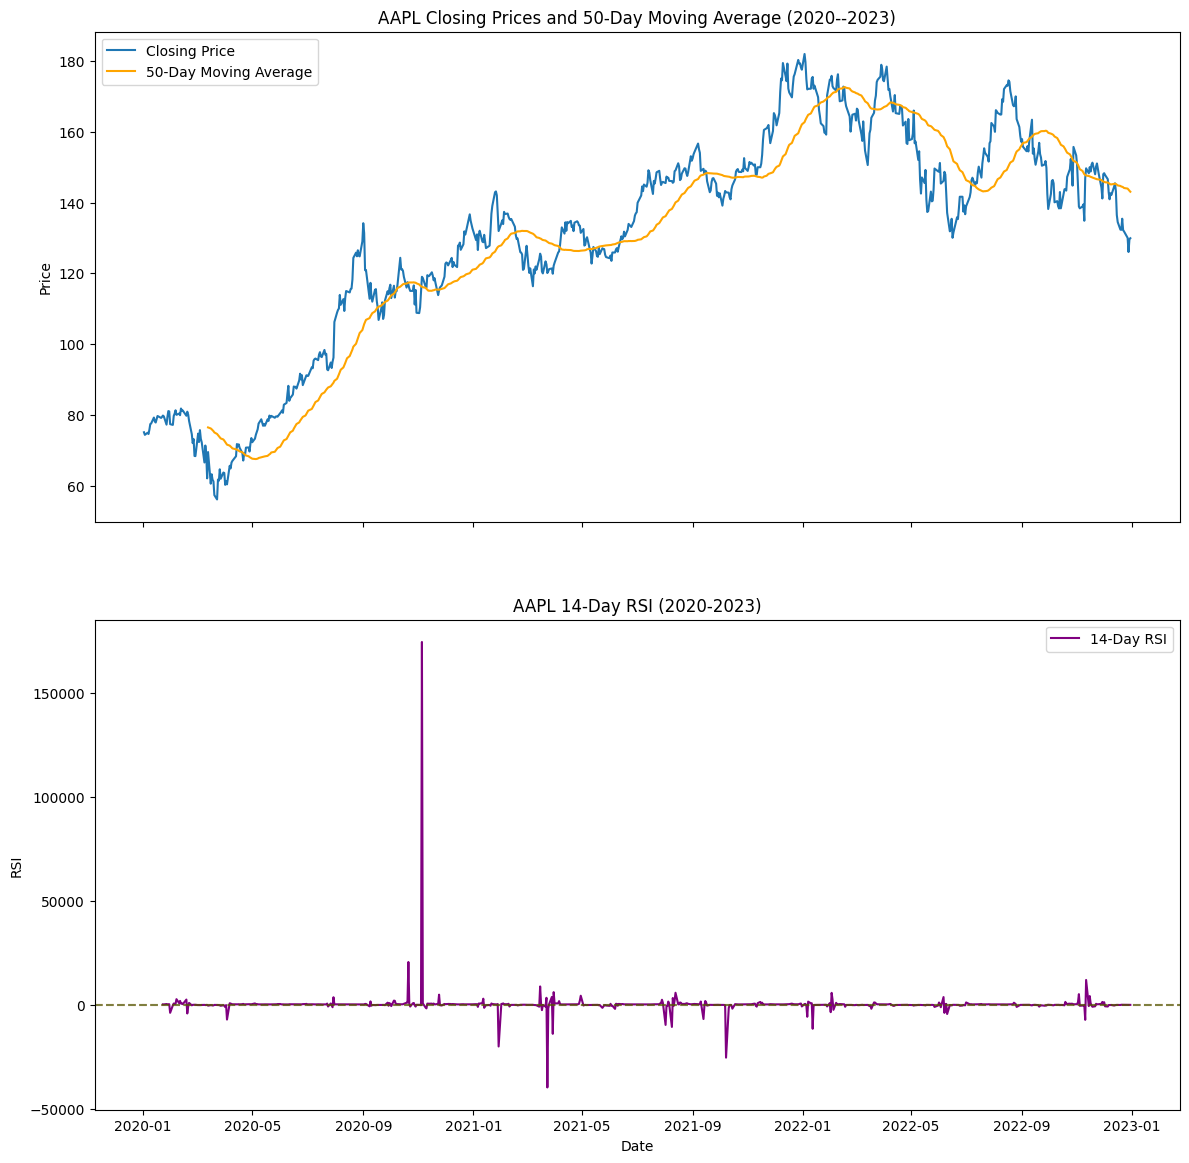

In [74]:
#Display both plots together
#create subplots for closing prices and RSI
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(14,14), sharex= True)
ax1.plot(data['Close'], label='Closing Price')
ax1.plot(data['MA50'], label='50-Day Moving Average', color='orange')
ax1.set_title('AAPL Closing Prices and 50-Day Moving Average (2020--2023)')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(data['RSI'],label='14-Day RSI', color='purple')
ax2.axhline(30, linestyle = '--', alpha=0.5, color='red')
ax2.axhline(70, linestyle = '--', alpha=0.5, color='green')
ax2.set_title('AAPL 14-Day RSI (2020-2023)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
plt.show()